In [1]:
%matplotlib inline
import pylab as plt

# Python in Astronomy

## SciPy

<center>
<code>何勃亮</code>
</center>
<center>
<code>中国科学院国家天文台 国家天文科学数据中心</code>
</center>

## SciPy

### NumPy 和 SciPy

![](images/numpy_scipy.png)

## SciPy

* Special functions ([scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html))
* Integration ([scipy.integrate](http://docs.scipy.org/doc/scipy/reference/integrate.html))
* Optimization ([scipy.optimize](http://docs.scipy.org/doc/scipy/reference/optimize.html))
* Interpolation ([scipy.interpolate](http://docs.scipy.org/doc/scipy/reference/interpolate.html))
* Fourier Transforms ([scipy.fftpack](http://docs.scipy.org/doc/scipy/reference/fftpack.html))
* Signal Processing ([scipy.signal](http://docs.scipy.org/doc/scipy/reference/signal.html))
* Linear Algebra ([scipy.linalg](http://docs.scipy.org/doc/scipy/reference/linalg.html))
* Sparse Eigenvalue Problems ([scipy.sparse](http://docs.scipy.org/doc/scipy/reference/sparse.html))
* Statistics ([scipy.stats](http://docs.scipy.org/doc/scipy/reference/stats.html))
* Multi-dimensional image processing ([scipy.ndimage](http://docs.scipy.org/doc/scipy/reference/ndimage.html))
* File IO ([scipy.io](http://docs.scipy.org/doc/scipy/reference/io.html))

In [2]:
import numpy as np
import scipy

### Special functions

[http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special](http://docs.scipy.org/doc/scipy/reference/special.html#module-scipy.special)

In [3]:
from scipy.special import jn

n = 0
x = 0.0

"J_{0:d}({1:f}) = {2:f}".format(n, x, jn(n, x))

'J_0(0.000000) = 1.000000'

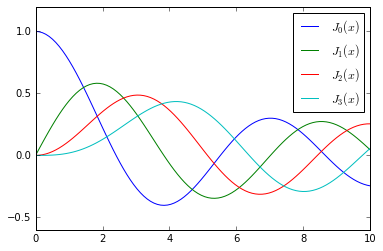

In [4]:
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
for n in range(4):
    ax.plot(x, jn(n, x), label=r"$J_%d(x)$" % n)
ax.legend();

### Integration

$\displaystyle \int_a^b f(x) dx$

In [5]:
from scipy.integrate import quad

# define a simple function for the integrand
def f(x):
    return x*x

In [6]:
x_lower = 0 # the lower limit of x
x_upper = 1 # the upper limit of x

val, abserr = quad(f, x_lower, x_upper)

"integral value ={}, absolute error ={}".format(val, abserr) 

'integral value =0.33333333333333337, absolute error =3.700743415417189e-15'

### Fourier transform

SciPy使用的FFT函数来自于Fortran程序

In [8]:
from numpy.fft import fftfreq
from scipy.fftpack import *

t = np.random.rand(30)

N = len(t)
dt = t[1]-t[0]

# calculate the fast fourier transform
# y2 is the solution to the under-damped oscillator from the previous section
F = fft(y2[:,0]) 

# calculate the frequencies for the components in F
w = fftfreq(N, dt)

NameError: name 'y2' is not defined

In [ ]:
fig, ax = plt.subplots(figsize=(9,3))
ax.plot(w_pos, abs(F_pos))
ax.set_xlim(0, 5);

### Linear algebra

http://docs.scipy.org/doc/scipy/reference/linalg.html

线性方程组

$A x = b$

In [9]:
from scipy.linalg import *

A = np.array([[1,2,3], [4,5,6], [7,8,9]])
b = np.array([1,2,3])

In [10]:
x = solve(A, b)

x

array([-0.33333333,  0.66666667,  0.        ])

In [11]:
# check
np.dot(A, x) - b

array([ -1.11022302e-16,   0.00000000e+00,   0.00000000e+00])

### 最优化 Optimization

### 寻找最小值

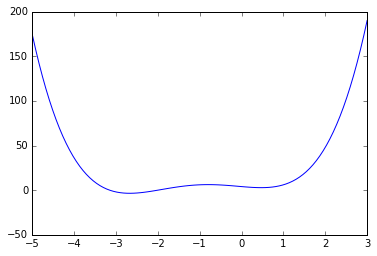

In [12]:
from scipy import optimize

def f(x):
    return 4*x**3 + (x-2)**2 + x**4

fig, ax  = plt.subplots()
x = np.linspace(-5, 3, 100)
ax.plot(x, f(x));

In [13]:
x_min = optimize.fmin_bfgs(f, -2)
x_min 

Optimization terminated successfully.
         Current function value: -3.506641
         Iterations: 6
         Function evaluations: 30
         Gradient evaluations: 10


array([-2.67298164])

In [14]:
x_min = optimize.fmin_bfgs(f, 0.5)
x_min 

Optimization terminated successfully.
         Current function value: 2.804988
         Iterations: 3
         Function evaluations: 15
         Gradient evaluations: 5


array([ 0.46961745])

In [15]:
optimize.brent(f)

0.46961743402759754

In [16]:
optimize.fminbound(f, -4, 2)

-2.6729822917513886

### Interpolation

In [17]:
from scipy.interpolate import *

In [18]:
def f(x):
    return np.sin(x)

In [19]:
n = np.arange(0, 10)  
x = np.linspace(0, 9, 100)

y_meas = f(n) + 0.1 * np.random.randn(len(n)) # simulate measurement with noise
y_real = f(x)

linear_interpolation = interp1d(n, y_meas)
y_interp1 = linear_interpolation(x)

cubic_interpolation = interp1d(n, y_meas, kind='cubic')
y_interp2 = cubic_interpolation(x)

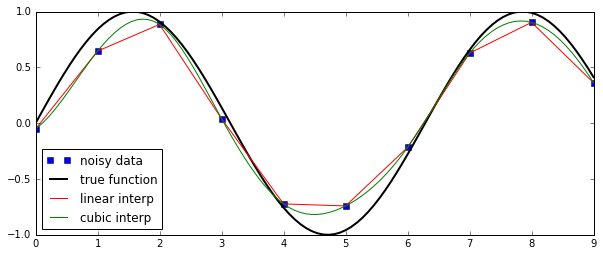

In [20]:
fig, ax = plt.subplots(figsize=(10,4))
ax.plot(n, y_meas, 'bs', label='noisy data')
ax.plot(x, y_real, 'k', lw=2, label='true function')
ax.plot(x, y_interp1, 'r', label='linear interp')
ax.plot(x, y_interp2, 'g', label='cubic interp')
ax.legend(loc=3);

### 统计

http://docs.scipy.org/doc/scipy/reference/stats.html

In [21]:
from scipy import stats

In [22]:
# create a (discreet) random variable with poissionian distribution

X = stats.poisson(3.5) # photon distribution for a coherent state with n=3.5 photons

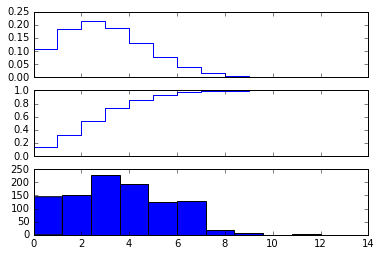

In [23]:
n = np.arange(0,15)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability mass function (PMF)
axes[0].step(n, X.pmf(n))

# plot the commulative distribution function (CDF)
axes[1].step(n, X.cdf(n))

# plot histogram of 1000 random realizations of the stochastic variable X
axes[2].hist(X.rvs(size=1000));

In [24]:
# create a (continous) random variable with normal distribution
Y = stats.norm()

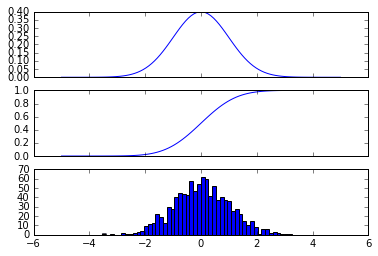

In [25]:
x = np.linspace(-5,5,100)

fig, axes = plt.subplots(3,1, sharex=True)

# plot the probability distribution function (PDF)
axes[0].plot(x, Y.pdf(x))

# plot the commulative distributin function (CDF)
axes[1].plot(x, Y.cdf(x));

# plot histogram of 1000 random realizations of the stochastic variable Y
axes[2].hist(Y.rvs(size=1000), bins=50);

In [26]:
X.mean(), X.std(), X.var() # poission distribution

(3.5, 1.8708286933869707, 3.5)

In [27]:
Y.mean(), Y.median(), Y.std(), Y.var() # normal distribution

(0.0, 0.0, 1.0, 1.0)

In [28]:
#  Statistical tests

t_statistic, p_value = stats.ttest_ind(X.rvs(size=1000), X.rvs(size=1000))

print("t-statistic = {}".format(t_statistic))
print("p-value ={}".format(p_value))

t-statistic = 1.1286809118317047
p-value =0.25916796614330784


- rvs 生成随机数的采样函数
- pdf 概率密度函数 连续
- pmf 概率密度函数 离散
- cdf 累积密度函数
- ...

## 文件读写

http://docs.scipy.org/doc/scipy/reference/io.html

- Matlab
- IDL
- FortranFile
- NetCDF
- Wav sound
- Arff